# Exploración de datos

## Cargue de librerias y parametros

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Agrega la ruta del directorio 'src' al path
sys.path.append(os.path.abspath('../src'))

# Ahora puedes importar tus módulos
from procesamiento_datos import *

Función de procesamiento de datos cargadas correctamente.


In [2]:
repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

## Cargue de los dataframes

In [3]:
# Definir la ruta a la carpeta 'data/raw'
datos_raw = "..//data/raw/"

# Cargar los datos
df_facturas = cargar_datos(datos_raw + "Historico_Facturas.csv")
df_cierres = cargar_datos(datos_raw + "Historico_Cierres.csv",sep=';')
df_negocios = cargar_datos(datos_raw + "Tipos_Negocio.csv")
df_ipc = cargar_datos(datos_raw + "Historico_IPC.csv", sep=';')
df_tasas = cargar_datos(datos_raw + "Historico_Tasas_Credito.csv", sep=';')
df_pib = cargar_datos(datos_raw + "Historico_PIB_Corriente_Desc.csv")
df_sml = cargar_datos(datos_raw + "Historico_Salario_Minimo.csv")

## Revisión Inicial dataframes
---
### df_facturas

In [4]:
# Revisión inicial de los DataFrames
print("\nDataFrame de Facturas:")
revision_inicial(df_facturas)


DataFrame de Facturas:
Primeras filas del DataFrame:


,NIT,id_factura,Fecha_expedicion,Estado,Total factura,Saldo,Fecha_pago,Fecha_vencimiento,Valor_pagado
0,42ee24fec8333f54a4615265bb3b91ce3300fdf90ed8c8...,186537,2025-06-18,CONFIRMADA,1035398.0,1035398.0,NaN,2025-07-18,0.0
1,46f8499a6c67d365a9242127ab7baf8a4e6505f2d4a4a4...,177214,2024-08-28,PAGADA,773500.0,0.0,2024-09-25 00:00:00,2024-09-27,773500.0
2,727ed2c81ecbb468b0239c55c137ebc8515e8977eaf5ca...,161840,2022-11-25,PAGADA,11900000.0,0.0,2024-11-28 00:00:00,2022-12-25,11900000.0
3,c1dad0801a0cf886e273e08c58becbde2fee81c39b7168...,161841,2022-11-25,PAGADA,11900000.0,0.0,2024-08-07 00:00:00,2022-12-25,11900000.0
4,bec32d6c8b8f837ddb1545d7637586ca649e56d895c1ed...,177216,2024-08-28,PAGADA,773500.0,0.0,2025-01-10 00:00:00,2024-09-27,773500.0



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61393 entries, 0 to 61392
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NIT                61393 non-null  object 
 1   id_factura         61393 non-null  int64  
 2   Fecha_expedicion   61393 non-null  object 
 3   Estado             61393 non-null  object 
 4   Total factura      61393 non-null  float64
 5   Saldo              61393 non-null  float64
 6   Fecha_pago         60546 non-null  object 
 7   Fecha_vencimiento  61393 non-null  object 
 8   Valor_pagado       61393 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.2+ MB
None

Descripción datos categoricos del DataFrame:
                                                      NIT Fecha_expedicion  \
count                                               61393            61393   
unique                                               2927          

In [5]:
#Cambiar el tipo de las columnas 
df_facturas[['Fecha_expedicion', 'Fecha_pago', 'Fecha_vencimiento']] = df_facturas[['Fecha_expedicion', 'Fecha_pago', 'Fecha_vencimiento']].apply(pd.to_datetime, errors='coerce')
df_facturas['id_factura'] = df_facturas['id_factura'].astype(str)

#redondear las columnas numéricas a 2 decimales
columnas_numericas = ['Total factura', 'Saldo', 'Valor_pagado']
for col in columnas_numericas:
    df_facturas[col] = pd.to_numeric(df_facturas[col], errors='coerce').round(2)

# Renombrar columnas para mayor claridad

df_facturas = df_facturas.rename(columns={
    'id_factura': 'numero_factura',
    'NIT': 'id_cliente',
    'Fecha_expedicion': 'fecha_expedicion',
    'Estado': 'estado',
    'Total factura': 'total_factura',
    'Saldo': 'saldo',
    'Fecha_pago': 'fecha_pago',
    'Fecha_vencimiento': 'fecha_vencimiento',
    'Valor_pagado': 'valor_pagado'
})

revision_inicial(df_facturas)

Primeras filas del DataFrame:


,id_cliente,numero_factura,fecha_expedicion,estado,total_factura,saldo,fecha_pago,fecha_vencimiento,valor_pagado
0,42ee24fec8333f54a4615265bb3b91ce3300fdf90ed8c8...,186537,2025-06-18,CONFIRMADA,1035398.0,1035398.0,NaT,2025-07-18,0.0
1,46f8499a6c67d365a9242127ab7baf8a4e6505f2d4a4a4...,177214,2024-08-28,PAGADA,773500.0,0.0,2024-09-25,2024-09-27,773500.0
2,727ed2c81ecbb468b0239c55c137ebc8515e8977eaf5ca...,161840,2022-11-25,PAGADA,11900000.0,0.0,2024-11-28,2022-12-25,11900000.0
3,c1dad0801a0cf886e273e08c58becbde2fee81c39b7168...,161841,2022-11-25,PAGADA,11900000.0,0.0,2024-08-07,2022-12-25,11900000.0
4,bec32d6c8b8f837ddb1545d7637586ca649e56d895c1ed...,177216,2024-08-28,PAGADA,773500.0,0.0,2025-01-10,2024-09-27,773500.0



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61393 entries, 0 to 61392
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_cliente         61393 non-null  object        
 1   numero_factura     61393 non-null  object        
 2   fecha_expedicion   61393 non-null  datetime64[ns]
 3   estado             61393 non-null  object        
 4   total_factura      61393 non-null  float64       
 5   saldo              61393 non-null  float64       
 6   fecha_pago         60546 non-null  datetime64[ns]
 7   fecha_vencimiento  61393 non-null  datetime64[ns]
 8   valor_pagado       61393 non-null  float64       
dtypes: datetime64[ns](3), float64(3), object(3)
memory usage: 4.2+ MB
None

Descripción datos categoricos del DataFrame:
                                               id_cliente numero_factura  \
count                                               61393    

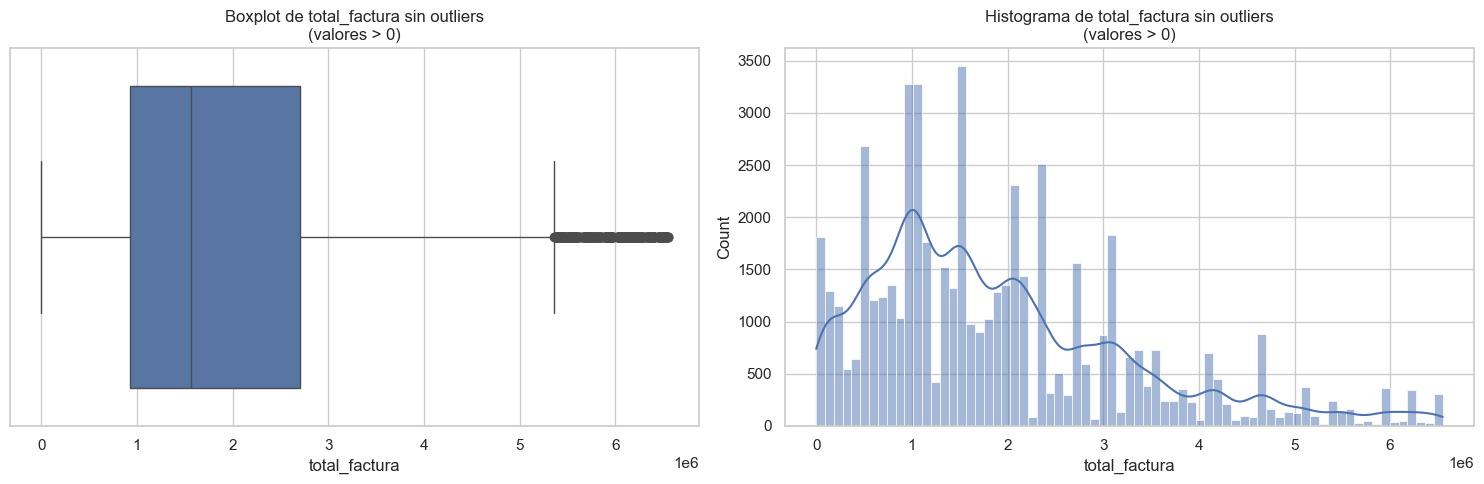

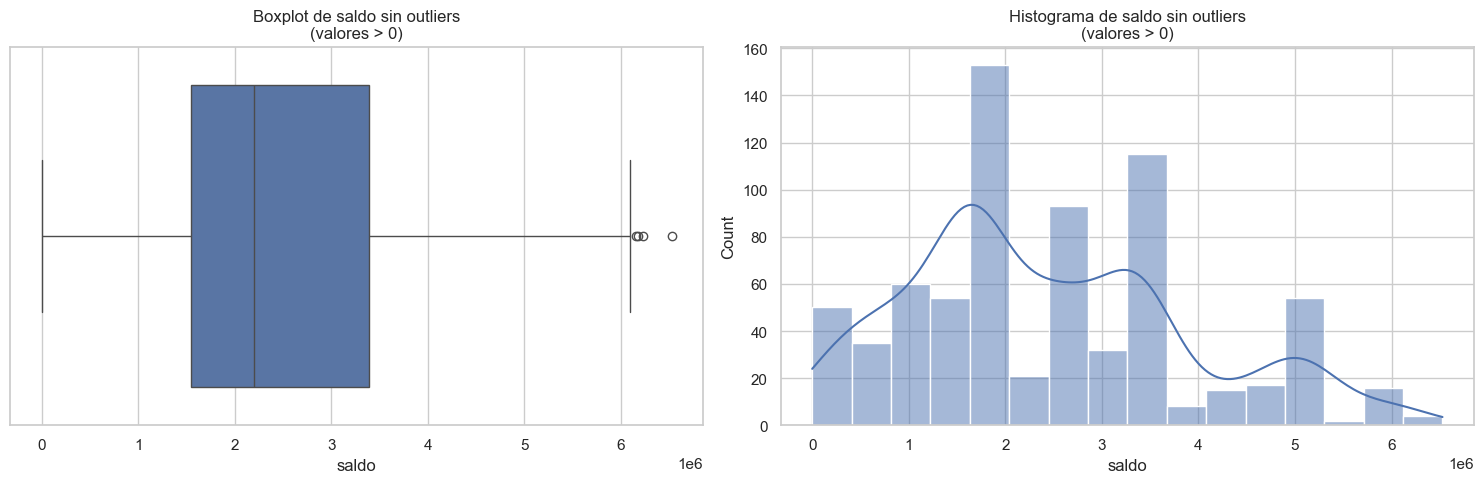

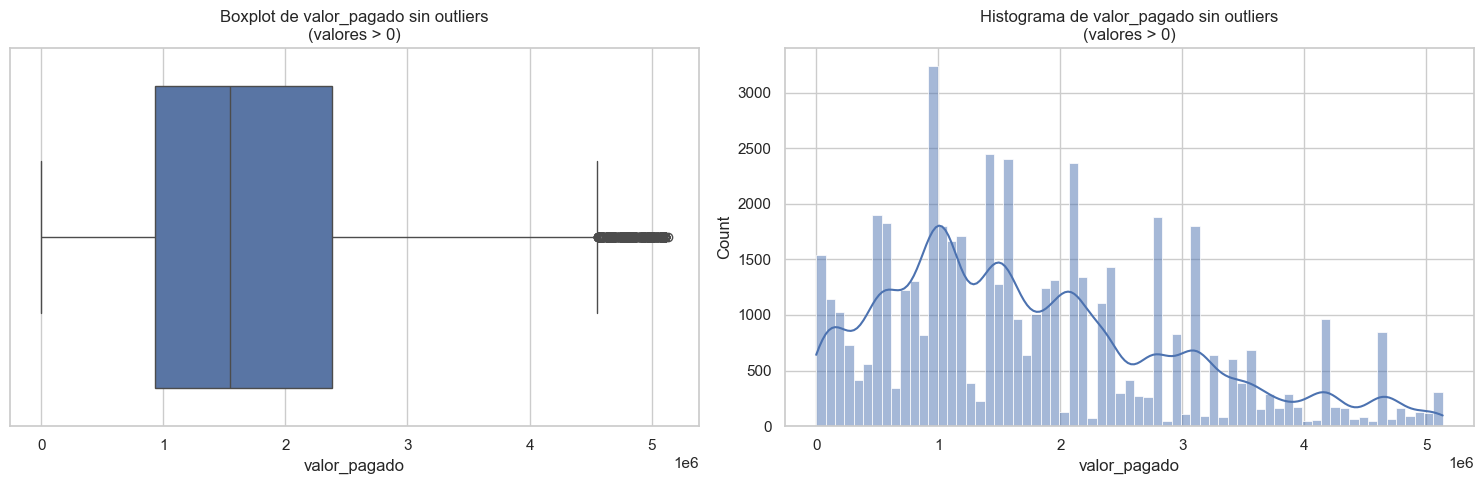

In [6]:
visualizar_distribucion(df_facturas, outliers=False)

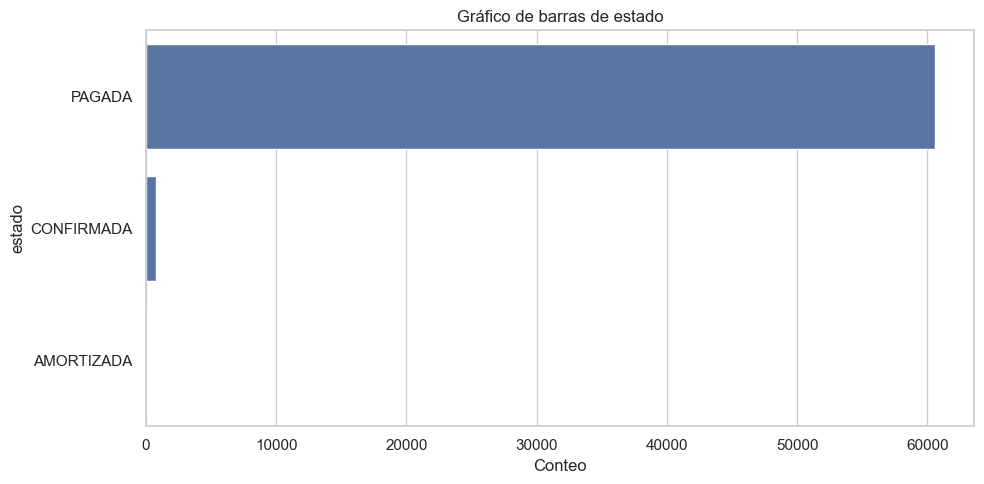

In [7]:
visualizar_categoricas(df_facturas, ['estado'])

### df_cierre

In [8]:
revision_inicial(df_cierres)

Primeras filas del DataFrame:


,Mes informe,NIT,Cliente,Fecha de Vencimiento,Dias de Mora,Calificación,Cuenta Por Cobrar,% de Deterioro T-1,Valor de Deterioro T-1,% de Deterioro,Valor de Deterioro,Diferencias,FID,Fideicomiso
0,202301,bda703a41ee55dcb911f17164009bc87636552bd5a641b...,2fd44f99ebb5f4779baa8f8c3c18b8aa3778395b58c9bf...,44819,0,A,2380000,"0,0022",5236,"0,0022",5236,0,b527ab75d12cba5a48db8e39b6dc776fafe8d0a64454c1...,ef41b40f72aabddd7491277f62e2d14d7f8126b6c06831...
1,202301,a6fbe7c3a37fa63f96d9ac3efe825deafc3c3d68ec13fe...,ddbb7aaaf540b1d826fe0a1b86d885bce851a6a10b17c1...,44985,0,A,0,"0,0022",0,"0,0022",0,0,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,c7b36740e4a4084fabf1f8fe801822e3c638dcc964917a...
2,202301,f81197f9f4a967d97235421ba58bbe1e28c3a5eaf0efec...,e7f467d21e1ae519b47b15c10f7de9368ada74e51d0e90...,44985,0,A,0,"0,0022",0,"0,0022",0,0,eaab7f29f0ebeeb28a5fcae7dba2f7b07bf2fa942bab4b...,f1cb9ef1cdaf60372aaecc67cf18b3e0faaec12172234f...
3,202301,c8ade62397784043d77a93a6884460c5d86843a81f9c26...,e9485dbb84aae5eb13fc27277fe3632c880ce13cf5c847...,44985,0,A,0,"0,0022",0,"0,0022",0,0,aa6df8861c8ad85418960d463c1bfff2ec9d257d58e5ab...,1fc58270cf6d565f7721f33a604319fd0fed003c975329...
4,202301,22a725be4cbf11a95514f3c8e93885502034dfc44b52a2...,30976b83fed3f372533fa798d28600e70c3afc2db43d26...,44985,0,A,0,"0,0022",0,"0,0022",0,0,22a725be4cbf11a95514f3c8e93885502034dfc44b52a2...,dfbe8cbeeca35fc3e79319d0ce9094df25966e94cef76b...



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13117 entries, 0 to 13116
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Mes informe              13117 non-null  int64 
 1   NIT                      13117 non-null  object
 2   Cliente                  13117 non-null  object
 3   Fecha de Vencimiento     13117 non-null  int64 
 4   Dias de Mora             13117 non-null  int64 
 5   Calificación             13117 non-null  object
 6   Cuenta Por Cobrar        13117 non-null  object
 7   % de Deterioro T-1       13117 non-null  object
 8   Valor de Deterioro  T-1  13117 non-null  object
 9   % de Deterioro           13117 non-null  object
 10  Valor de Deterioro       13117 non-null  object
 11  Diferencias              13117 non-null  object
 12  FID                      13117 non-null  object
 13  Fideicomiso              13117 non-null  object
dtypes: int64(3

In [9]:
# Eliminar las columnas: 'Cliente', 'Fecha de Vencimiento' y 5 otras columnas
df_cierres = df_cierres.drop(columns=['Cliente', 'Fecha de Vencimiento', '% de Deterioro T-1', 'Valor de Deterioro  T-1', '% de Deterioro', 'Diferencias', 'Fideicomiso'])

# Transform 'Mes informe' to datetime with last day of the month
df_cierres['Mes informe'] = pd.to_datetime(df_cierres['Mes informe'].astype(str), format='%Y%m') + MonthEnd(0)

# Convert 'Cuenta Por Cobrar' and 'Valor de Deterioro' to decimal
df_cierres['Cuenta Por Cobrar'] = df_cierres['Cuenta Por Cobrar'].str.replace(',', '').astype(float)
df_cierres['Valor de Deterioro'] = df_cierres['Valor de Deterioro'].str.replace(',', '').astype(float)

# Cambiar el nombre de la columna 'Mes informe' a 'mes_cierre'
df_cierres = df_cierres.rename(columns={
    'Mes informe': 'fecha_cierre',
    'NIT':'id_cliente',
    'Dias de Mora':'dias_mora',
    'Calificación':'calificacion',
    'Cuenta Por Cobrar':'cuenta_cobrar',
    'Valor de Deterioro':'deterioro',
    'FID':'id_negocio'})

revision_inicial(df_cierres)

Primeras filas del DataFrame:


,fecha_cierre,id_cliente,dias_mora,calificacion,cuenta_cobrar,deterioro,id_negocio
0,2023-01-31,bda703a41ee55dcb911f17164009bc87636552bd5a641b...,0,A,2380000.0,5236.0,b527ab75d12cba5a48db8e39b6dc776fafe8d0a64454c1...
1,2023-01-31,a6fbe7c3a37fa63f96d9ac3efe825deafc3c3d68ec13fe...,0,A,0.0,0.0,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
2,2023-01-31,f81197f9f4a967d97235421ba58bbe1e28c3a5eaf0efec...,0,A,0.0,0.0,eaab7f29f0ebeeb28a5fcae7dba2f7b07bf2fa942bab4b...
3,2023-01-31,c8ade62397784043d77a93a6884460c5d86843a81f9c26...,0,A,0.0,0.0,aa6df8861c8ad85418960d463c1bfff2ec9d257d58e5ab...
4,2023-01-31,22a725be4cbf11a95514f3c8e93885502034dfc44b52a2...,0,A,0.0,0.0,22a725be4cbf11a95514f3c8e93885502034dfc44b52a2...



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13117 entries, 0 to 13116
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   fecha_cierre   13117 non-null  datetime64[ns]
 1   id_cliente     13117 non-null  object        
 2   dias_mora      13117 non-null  int64         
 3   calificacion   13117 non-null  object        
 4   cuenta_cobrar  13117 non-null  float64       
 5   deterioro      13117 non-null  float64       
 6   id_negocio     13117 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 717.5+ KB
None

Descripción datos categoricos del DataFrame:
                                               id_cliente calificacion  \
count                                               13117        13117   
unique                                                835            5   
top     f81197f9f4a967d97235421ba58bbe1e28c3a5eaf

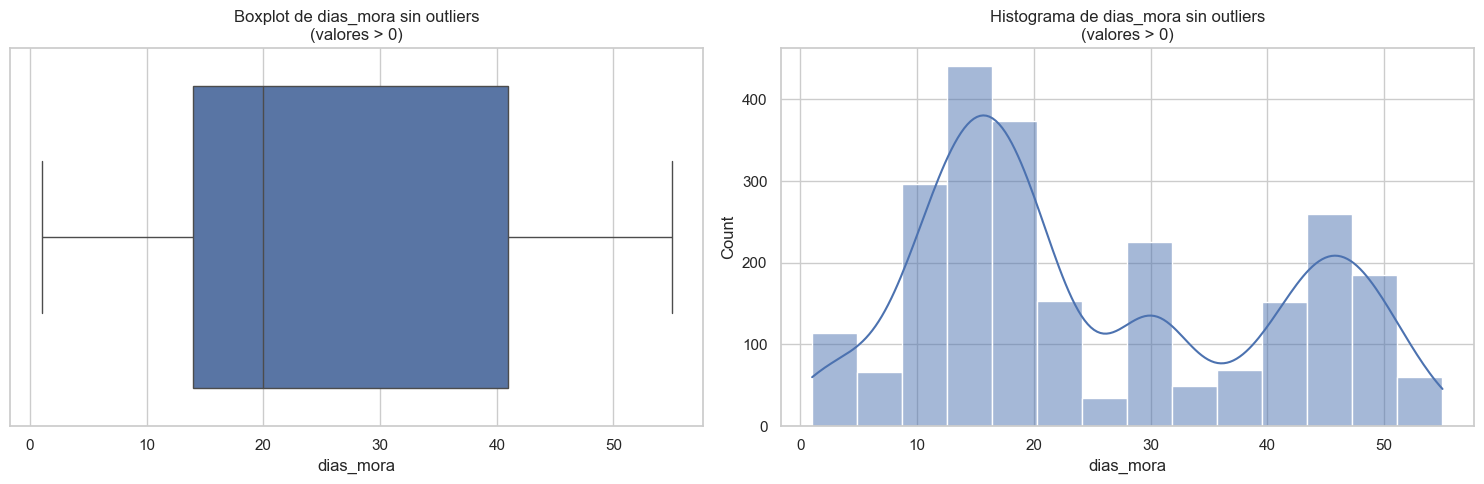

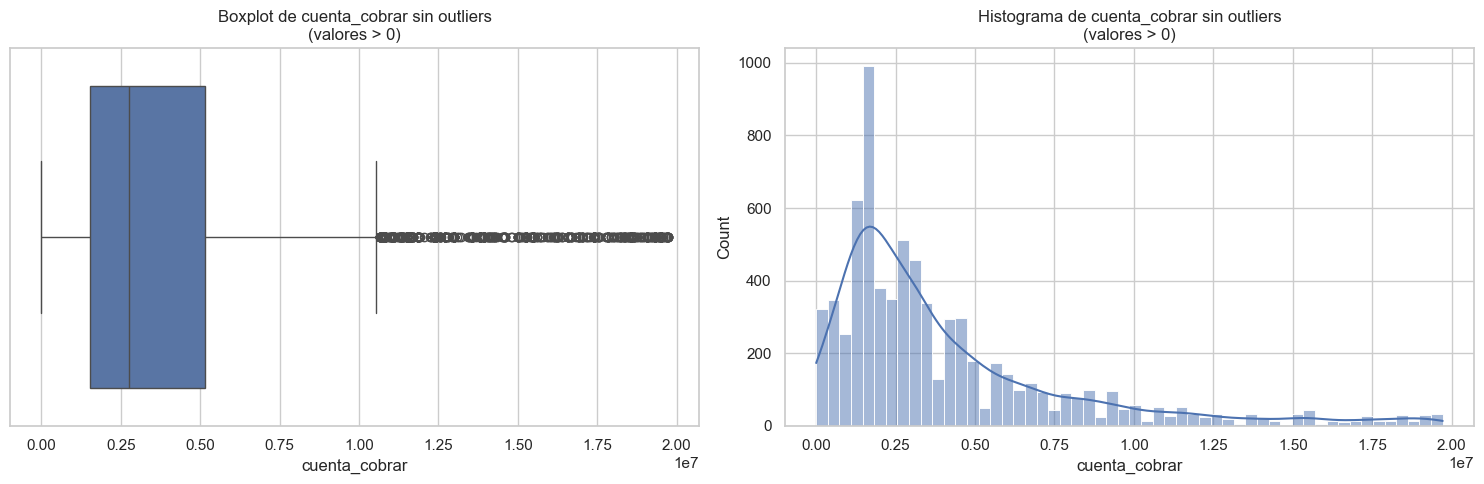

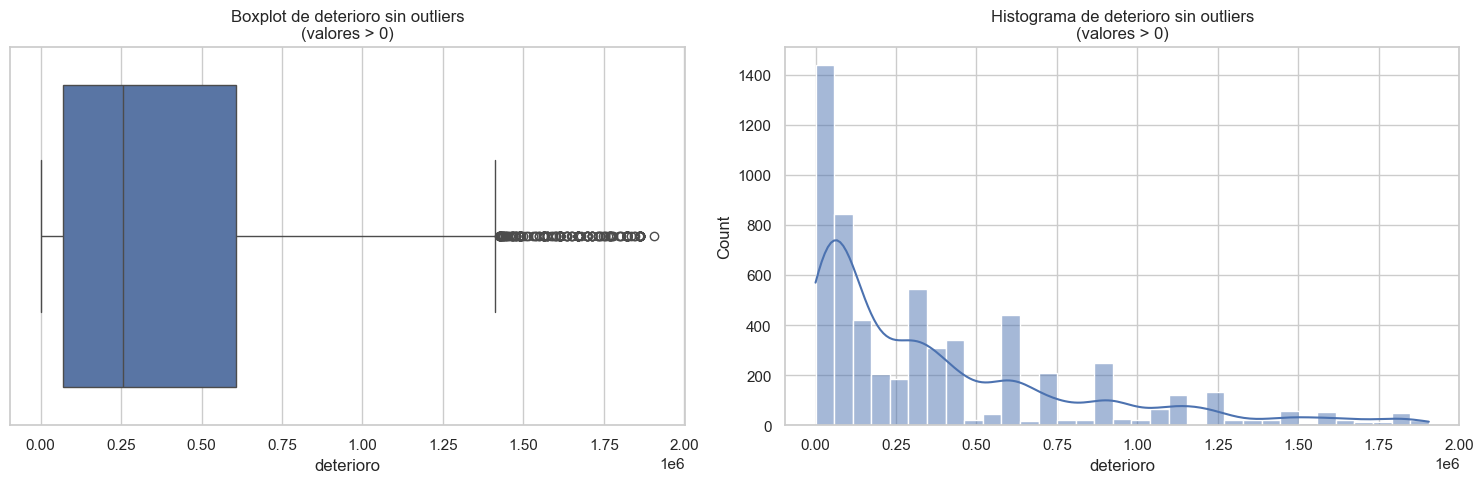

In [10]:
visualizar_distribucion(df_cierres, outliers=False)

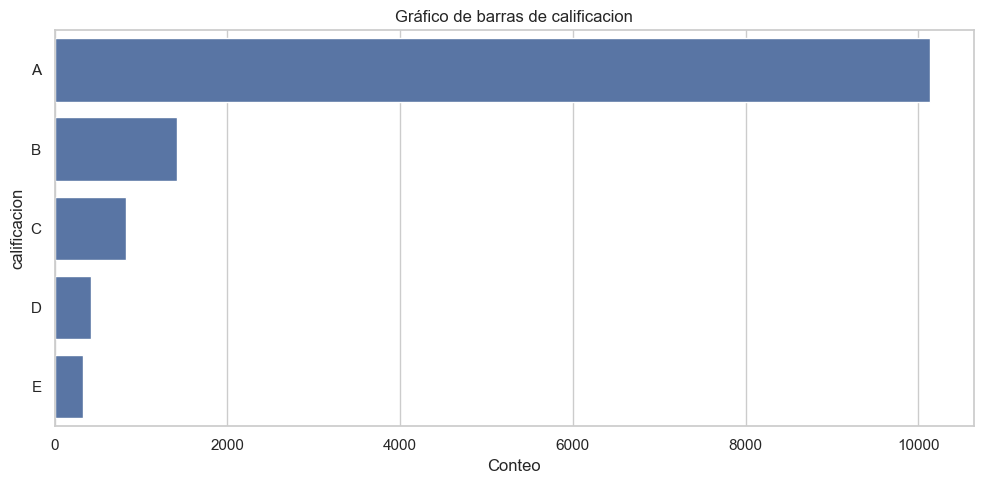

In [11]:
visualizar_categoricas(df_cierres,['calificacion'])

In [12]:
revision_inicial(df_negocios)

Primeras filas del DataFrame:


,cod_negocio,id_linea,nombre_linea
0,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,99,Otros
1,d31b04b46bdb26afe654ff6cbed3dab17aece4cce466bd...,3,Administración
2,17402467b764a01585e1d5a55ea74769f652cd0537d69a...,3,Administración
3,e41bb15d9efcd5aac9e9b586b6014ca03b39a953d7684e...,3,Administración
4,c1d3e8240ccdeee4a007ed90b3598558488f21b01bc69e...,2,Inmobiliario



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cod_negocio   1487 non-null   object
 1   id_linea      1487 non-null   int64 
 2   nombre_linea  1487 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None

Descripción datos categoricos del DataFrame:
                                              cod_negocio    nombre_linea
count                                                1487            1487
unique                                               1487               7
top     74aa2876946a29cfca3a0ea9d7dd77461ad9138f1b4f6a...  Administración
freq                                                    1             725

Descripción datos cuantitativos del DataFrame:
          id_linea
count  1487.000000
mean      2.891728
std       2.810953
min       1.000000
25%       2.000000
50%       3.000000
75%

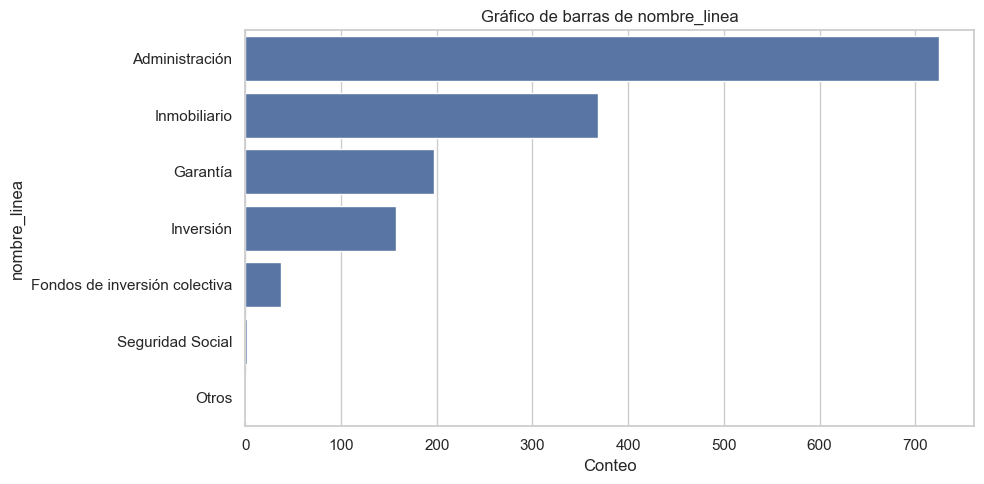

In [13]:
visualizar_categoricas(df_negocios, ['nombre_linea'])

## Creación de features

In [14]:
fecha_referencia = pd.to_datetime('2025-06-30')

def calcular_dias_demora(row):
    if row ['estado'] == 'PAGADA' and row ['fecha_pago'] != 'NaT':
        return ( row['fecha_pago'] - row['fecha_vencimiento']).days
    else:
        return ( fecha_referencia - row['fecha_vencimiento']).days

df_facturas ['dias_demora'] = df_facturas.apply(calcular_dias_demora, axis=1)

In [15]:
#si los días de mora son negativos o iguales a 0 el habito de pago es bueno = 1 , si son mayores a 0 el habito de pago es malo = 0 
df_facturas['habito_pago'] = df_facturas['dias_demora'].apply(lambda x: 1 if x <= 0 else 0)

In [16]:
df_facturas

,id_cliente,numero_factura,fecha_expedicion,estado,total_factura,saldo,fecha_pago,fecha_vencimiento,valor_pagado,dias_demora,habito_pago
0,42ee24fec8333f54a4615265bb3b91ce3300fdf90ed8c8...,186537,2025-06-18,CONFIRMADA,1035398.0,1035398.0,NaT,2025-07-18,0.0,-18,1
1,46f8499a6c67d365a9242127ab7baf8a4e6505f2d4a4a4...,177214,2024-08-28,PAGADA,773500.0,0.0,2024-09-25,2024-09-27,773500.0,-2,1
2,727ed2c81ecbb468b0239c55c137ebc8515e8977eaf5ca...,161840,2022-11-25,PAGADA,11900000.0,0.0,2024-11-28,2022-12-25,11900000.0,704,0
3,c1dad0801a0cf886e273e08c58becbde2fee81c39b7168...,161841,2022-11-25,PAGADA,11900000.0,0.0,2024-08-07,2022-12-25,11900000.0,591,0
4,bec32d6c8b8f837ddb1545d7637586ca649e56d895c1ed...,177216,2024-08-28,PAGADA,773500.0,0.0,2025-01-10,2024-09-27,773500.0,105,0
...,...,...,...,...,...,...,...,...,...,...,...
61388,97b31466918fd7e03c16a066ce401222e419af2be7a68f...,181279,2025-02-13,PAGADA,41562106.0,0.0,2025-06-09,2025-03-15,41562106.0,86,0
61389,97b31466918fd7e03c16a066ce401222e419af2be7a68f...,184044,2025-03-06,PAGADA,43257302.0,0.0,2025-03-20,2025-04-05,43257302.0,-16,1
61390,97b31466918fd7e03c16a066ce401222e419af2be7a68f...,185064,2025-04-14,PAGADA,45900437.0,0.0,2025-04-16,2025-05-14,45900437.0,-28,1
61391,97b31466918fd7e03c16a066ce401222e419af2be7a68f...,185619,2025-05-09,PAGADA,45269411.0,0.0,2025-06-23,2025-06-08,45269411.0,15,0


In [17]:
print("Estadísticas de días de demora por estado:")
for estado in df_facturas['estado'].unique():
    subset = df_facturas[df_facturas['estado'] == estado]['dias_demora']
    print(f"\n{estado}:")
    print(f"  Count: {subset.count()}")
    print(f"  Mean: {subset.mean():.1f}")
    print(f"  Median: {subset.median():.1f}")
    print(f"  Max: {subset.max()}")

Estadísticas de días de demora por estado:

CONFIRMADA:
  Count: 786
  Mean: 70.2
  Median: 16.0
  Max: 1662

PAGADA:
  Count: 60546
  Mean: 647.1
  Median: 476.0
  Max: 2696

AMORTIZADA:
  Count: 61
  Mean: 163.8
  Median: 50.0
  Max: 1690


<Axes: ylabel='Frequency'>

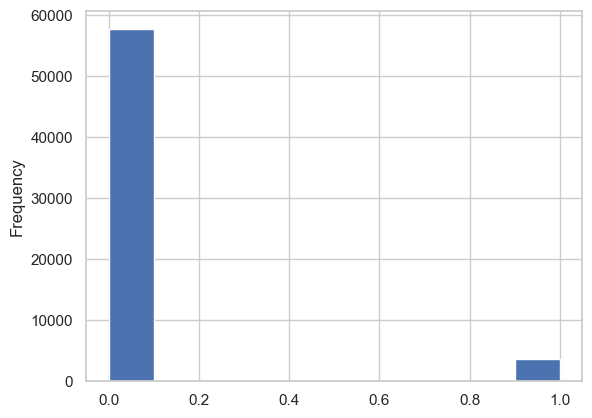

In [18]:
df_facturas['habito_pago'].plot.hist()

In [19]:
df_prueba = df_cierres.merge(df_negocios, left_on='id_negocio', right_on='cod_negocio', how='left')
df_prueba

,fecha_cierre,id_cliente,dias_mora,calificacion,cuenta_cobrar,deterioro,id_negocio,cod_negocio,id_linea,nombre_linea
0,2023-01-31,bda703a41ee55dcb911f17164009bc87636552bd5a641b...,0,A,2380000.0,5236.0,b527ab75d12cba5a48db8e39b6dc776fafe8d0a64454c1...,b527ab75d12cba5a48db8e39b6dc776fafe8d0a64454c1...,2.0,Inmobiliario
1,2023-01-31,a6fbe7c3a37fa63f96d9ac3efe825deafc3c3d68ec13fe...,0,A,0.0,0.0,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,99.0,Otros
2,2023-01-31,f81197f9f4a967d97235421ba58bbe1e28c3a5eaf0efec...,0,A,0.0,0.0,eaab7f29f0ebeeb28a5fcae7dba2f7b07bf2fa942bab4b...,eaab7f29f0ebeeb28a5fcae7dba2f7b07bf2fa942bab4b...,3.0,Administración
3,2023-01-31,c8ade62397784043d77a93a6884460c5d86843a81f9c26...,0,A,0.0,0.0,aa6df8861c8ad85418960d463c1bfff2ec9d257d58e5ab...,aa6df8861c8ad85418960d463c1bfff2ec9d257d58e5ab...,9.0,Fondos de inversión colectiva
4,2023-01-31,22a725be4cbf11a95514f3c8e93885502034dfc44b52a2...,0,A,0.0,0.0,22a725be4cbf11a95514f3c8e93885502034dfc44b52a2...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13112,2025-06-30,93c7f33267a36b3830bb2af33b99623fc6471effa12977...,561,E,36421600.0,36421600.0,79c34e61bb9da63b9bb88d87c02a531d8af9ed16d85c22...,79c34e61bb9da63b9bb88d87c02a531d8af9ed16d85c22...,2.0,Inmobiliario
13113,2025-06-30,56b789dc96acbcaa088edaf0439c0a901f961905680675...,466,E,49906220.0,49906220.0,136a27f6f0fd70909720b12ee3519e5aaedfbbfbbce1da...,136a27f6f0fd70909720b12ee3519e5aaedfbbfbbce1da...,4.0,Garantía
13114,2025-06-30,f495b5a0005d360b2a2c3e358b2d7973c0b3e7a76e371d...,962,E,13042400.0,13042400.0,8005c981fac40b3ab78dc2d9271bed69f4f8b9d1e18686...,8005c981fac40b3ab78dc2d9271bed69f4f8b9d1e18686...,4.0,Garantía
13115,2025-06-30,fbbabd04e6dd67e5db8b9bb554145338c77d7415d5f620...,1689,E,238394336.0,238394336.0,9ac073a07be208df6fa2ee0e4ce2a1e66c3e7156772228...,9ac073a07be208df6fa2ee0e4ce2a1e66c3e7156772228...,2.0,Inmobiliario
